In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fname= f"/content/drive/MyDrive/BT4012/data/kaggle_transaction_dataset.csv"

df = pd.read_csv(fname)
df

,address,flag,avgTimeBetweenSentTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,createdContracts,numUniqRecAddress,numUniqSentAddress,...,maxValReceived,avgValReceived,minValSent,maxValSent,avgValSent,totalTransactions,totalEtherSent,totalEtherReceived,totalEtherSentContracts,totalEtherBalance
0,0xd0cc2b24980cbcca47ef755da88b220a82291407,1,5.807655e+04,7.148260e+07,46.00,66,21,0,17,47,...,266.000000,17.486340,0.000000,183.0,5.559412,87,366.921190,367.213130,0.0,0.291940
1,0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.000000e+00,7.529115e+08,35.00,0,2,0,2,0,...,0.010000,0.006771,0.000000,0.0,0.000000,2,0.000000,0.013541,0.0,0.013541
2,0x00e01a648ff41346cdeb873182383333d2184dd1,1,1.710279e+06,6.820612e+07,299.00,15,22,0,21,13,...,49.999314,9.100750,0.000000,25.0,13.330000,37,199.950000,200.216494,0.0,0.266494
3,0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,1.576106e+04,1.352571e+07,36.00,109,111,0,104,54,...,193.500000,14.689887,0.000000,680.0,14.959358,220,1630.570000,1630.577419,0.0,0.007419
4,0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.000000e+00,3.751409e+08,82.00,1,4,0,4,1,...,1.000000,0.475550,1.900000,1.9,1.900000,5,1.900000,1.902199,0.0,0.002199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21982,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,1.263510e+04,6.313900e+02,58748.48,4,13,0,11,4,...,12.000000,2.821060,0.465461,12.2,9.166365,17,36.665461,36.673777,0.0,0.008316
21983,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.000000e+00,0.000000e+00,0.00,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0,0.000000
21984,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2.499440e+03,2.189290e+03,261601.88,67,43,0,31,44,...,21.310000,1.234192,0.004000,9.5,0.922179,110,61.785995,53.070252,0.0,-8.715743
21985,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.000000e+00,0.000000e+00,0.00,0,1,0,1,0,...,0.500000,0.500000,0.000000,0.0,0.000000,1,0.000000,0.500000,0.0,0.500000


Training LR
- Split into train and test

In [8]:
from sklearn.model_selection import train_test_split

# feature selection for training
print(df.columns)

df_model = df.copy().drop(columns=['address'])

# split train and test set
X, y = df_model.drop(columns=['flag']), df_model['flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Index(['address', 'flag', 'avgTimeBetweenSentTnx', 'avgTimeBetweenRecTnx',
       'lifetime', 'sentTransactions', 'receivedTransactions',
       'createdContracts', 'numUniqRecAddress', 'numUniqSentAddress',
       'minValReceived', 'maxValReceived', 'avgValReceived', 'minValSent',
       'maxValSent', 'avgValSent', 'totalTransactions', 'totalEtherSent',
       'totalEtherReceived', 'totalEtherSentContracts', 'totalEtherBalance'],
      dtype='object')


Check for imbalanced class

In [9]:
df_model['flag'].value_counts()

0    14658
1     7329
Name: flag, dtype: int64

Training with SMOTE, oversampling minority class

In [10]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# transform df
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# summarise new class dist
counter = Counter(y_train_smote)
print(counter)

Counter({0: 9794, 1: 9794})


Logistic Regression with SMOTE sag model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [12]:
#l2
model = LogisticRegression(max_iter=10000, solver="sag", random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.663 (0.014)


In [13]:
model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=42, solver='sag')

In [14]:
import pickle
filename = 'model_lr_l2_sag.sav'
pickle.dump(model, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [15]:
model.score(X_test, y_test)

0.649393605292172

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [17]:
filename = 'model_lr_l2_sag.sav'
model = pickle.load(open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'rb'))

In [18]:
predicted = model.predict(X_test)

In [19]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      4864
           1       0.47      0.60      0.53      2392

    accuracy                           0.65      7256
   macro avg       0.62      0.64      0.63      7256
weighted avg       0.68      0.65      0.66      7256



In [20]:
print(f"Accuracy: {accuracy_score(y_test, predicted)}")
print(f"Precision: {precision_score(y_test, predicted)}")
print(f"Recall: {recall_score(y_test, predicted)}")
print(f"F1-score: {f1_score(y_test, predicted)}")

Accuracy: 0.649393605292172
Precision: 0.4749009247027741
Recall: 0.6011705685618729
F1-score: 0.5306273062730626


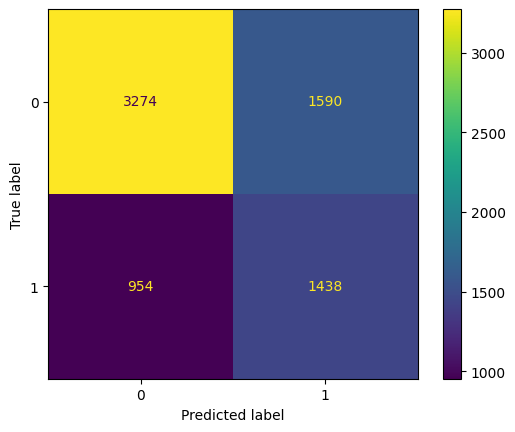

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.show()

Logistic Regression with SMOTE lbfgs model

In [24]:
#l2 (lbfgs)
model_lbfgs = LogisticRegression(max_iter=10000, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_lbfgs, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.681 (0.015)


In [25]:
model_lbfgs.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=42)

In [26]:
import pickle
filename = 'model_lr_l2.sav'
pickle.dump(model_lbfgs, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [27]:
model_lbfgs.score(X_test, y_test)

0.6295479603087101

In [28]:
filename = 'model_lr_l2.sav'
model_lbfgs = pickle.load(open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'rb'))

In [29]:
predicted_lbfgs = model_lbfgs.predict(X_test)


In [30]:
print(classification_report(y_test, predicted_lbfgs))


              precision    recall  f1-score   support

           0       0.75      0.67      0.71      4864
           1       0.45      0.54      0.49      2392

    accuracy                           0.63      7256
   macro avg       0.60      0.61      0.60      7256
weighted avg       0.65      0.63      0.64      7256



In [31]:
print(f"Accuracy: {accuracy_score(y_test, predicted_lbfgs)}")
print(f"Precision: {precision_score(y_test, predicted_lbfgs)}")
print(f"Recall: {recall_score(y_test, predicted_lbfgs)}")
print(f"F1-score: {f1_score(y_test, predicted_lbfgs)}")


Accuracy: 0.6295479603087101
Precision: 0.44857539958304377
Recall: 0.5397157190635451
F1-score: 0.4899430740037951


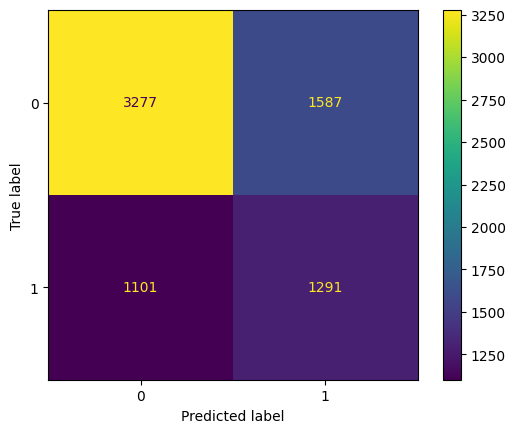

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_lbfgs, labels=model_lbfgs.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lbfgs.classes_)

disp.plot()
plt.show()

Oversampling training set

In [34]:
from imblearn.over_sampling import RandomOverSampler

print(Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0: 9794, 1: 4937})
Counter({0: 9794, 1: 9794})


In [35]:
model_over = LogisticRegression(max_iter=10000, random_state=42)
model_over.fit(X_train_over, y_train_over)
model_over.score(X_test, y_test)

0.6307883131201764

In [36]:
predicted_over = model_over.predict(X_test)

In [37]:
print(f"Accuracy: {accuracy_score(y_test, predicted_over)}")
print(f"Precision: {precision_score(y_test, predicted_over)}")
print(f"Recall: {recall_score(y_test, predicted_over)}")
print(f"F1-score: {f1_score(y_test, predicted_over)}")

Accuracy: 0.6307883131201764
Precision: 0.4516672280229033
Recall: 0.56061872909699
F1-score: 0.5002797985450476


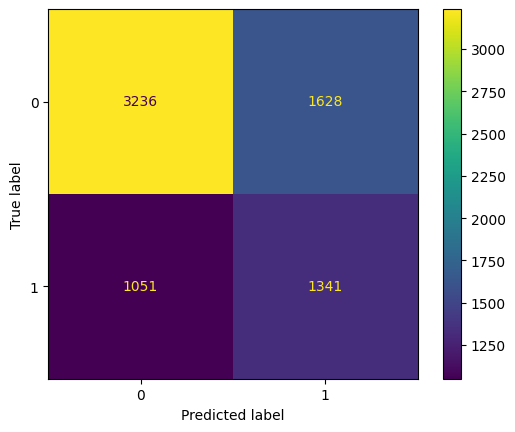

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_over, labels=model_over.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_over.classes_)

disp.plot()
plt.show()

Logistic Regression with Standardisation

Standard Scaler

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
oversample = SMOTE()
X_train_smote_scaled, y_train_smote_scaled = oversample.fit_resample(X_train_scaled, y_train)
# summarize the new class distribution
counter = Counter(y_train_smote_scaled)
print(counter)

Counter({0: 9794, 1: 9794})


In [42]:
model_smote_scaled = LogisticRegression(max_iter=10000, random_state=42)
model_smote_scaled.fit(X_train_smote_scaled, y_train_smote_scaled)
model_smote_scaled.score(X_test_scaled, y_test)

0.6449834619625138

In [43]:
predicted_smote_scaled = model_smote_scaled.predict(X_test_scaled)

In [44]:
import pickle
filename = 'model_lr_lbfgs_standardised.sav'
pickle.dump(model_smote_scaled, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [45]:
print(f"Accuracy: {accuracy_score(y_test, predicted_smote_scaled)}")
print(f"Precision: {precision_score(y_test, predicted_smote_scaled)}")
print(f"Recall: {recall_score(y_test, predicted_smote_scaled)}")
print(f"F1-score: {f1_score(y_test, predicted_smote_scaled)}")

Accuracy: 0.6449834619625138
Precision: 0.4796819787985866
Recall: 0.9080267558528428
F1-score: 0.6277456647398844


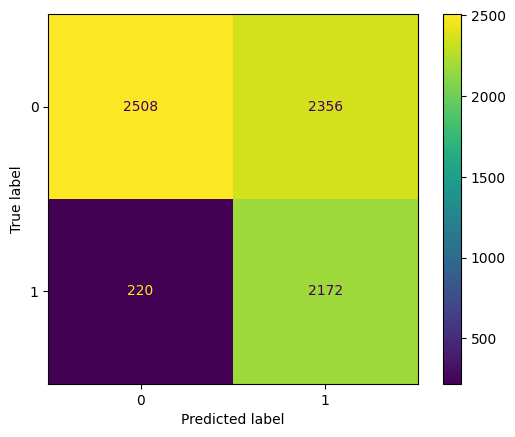

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_smote_scaled, labels=model_smote_scaled.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_smote_scaled.classes_)

disp.plot()
plt.show()

Min Max Scaler

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
oversample = SMOTE()
X_train_smote_scaled, y_train_smote_scaled = oversample.fit_resample(X_train_scaled, y_train)
# summarize the new class distribution
counter = Counter(y_train_smote_scaled)
print(counter)

Counter({0: 9794, 1: 9794})


In [49]:
model_smote_scaled = LogisticRegression(max_iter=10000, random_state=42)
model_smote_scaled.fit(X_train_smote_scaled, y_train_smote_scaled)
model_smote_scaled.score(X_test_scaled, y_test)

0.6138368246968027

In [50]:
predicted_smote_scaled = model_smote_scaled.predict(X_test_scaled)

In [51]:
filename = 'model_lr_lbfgs_standardised.sav'
pickle.dump(model_smote_scaled, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [52]:
print(f"Accuracy: {accuracy_score(y_test, predicted_smote_scaled)}")
print(f"Precision: {precision_score(y_test, predicted_smote_scaled)}")
print(f"Recall: {recall_score(y_test, predicted_smote_scaled)}")
print(f"F1-score: {f1_score(y_test, predicted_smote_scaled)}")

Accuracy: 0.6138368246968027
Precision: 0.4570230607966457
Recall: 0.9113712374581939
F1-score: 0.6087685004188773


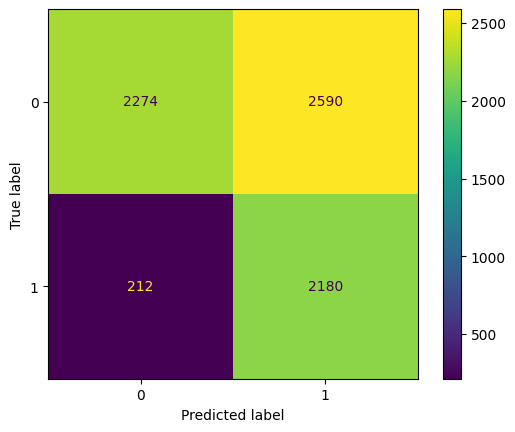

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_smote_scaled, labels=model_smote_scaled.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_smote_scaled.classes_)

disp.plot()
plt.show()

In [54]:
print(classification_report(y_test, predicted_smote_scaled))

              precision    recall  f1-score   support

           0       0.91      0.47      0.62      4864
           1       0.46      0.91      0.61      2392

    accuracy                           0.61      7256
   macro avg       0.69      0.69      0.61      7256
weighted avg       0.76      0.61      0.62      7256



Hyperparam tuning

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

oversample = SMOTE()
X_train_smote_scaled, y_train_smote_scaled = oversample.fit_resample(X_train_scaled, y_train)
# summarize the new class distribution
counter = Counter(y_train_smote_scaled)
print(counter)


Counter({0: 9794, 1: 9794})


fmin

In [56]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space = {
    # 'warm_start' : hp.choice('warm_start', [True, False]),
    # 'fit_intercept' : hp.choice('fit_intercept', [True, False]),
    'tol' : hp.uniform('tol', 0.00001, 0.0001),
    'C' : hp.uniform('C', 0.05, 3),
    'solver' : hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
    'max_iter' : hp.choice('max_iter', range(5,1000)),
    'l1_ratio': hp.uniform('x_l1',0,1),
}

def objective(space):
    solver=space['solver']
    # penalty=space['solver']['penalty']
    clf=LogisticRegression(C=space['C'], tol=space['tol'], l1_ratio=space['l1_ratio'], solver=solver, max_iter=space['l1_ratio'])
    clf.fit(X_train_smote_scaled, y_train_smote_scaled)
    acc=clf.score(X_test_scaled,y_test)
    return {'loss': -acc, 'status': STATUS_OK}


In [57]:
trials = Trials()

best_hyperparams_smote = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]

ERROR:hyperopt.fmin:job exception: The 'max_iter' parameter of LogisticRegression must be an int in the range [0, inf). Got 0.06652813005212599 instead.


  0%|          | 0/500 [00:00<?, ?trial/s, best loss=?]


InvalidParameterError: ignored

In [ ]:
best_hyperparams_smote

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.2331574151340383, l1_ratio=0.7459657357162148, tol=2.1073284551232667e-05, max_iter=988)
model.fit(X_train_smote, y_train_smote)
model.score(X_test, y_test)

In [ ]:
import pickle
filename = 'model_lr_tuned_smote.sav'
pickle.dump(model, open(f"/content/drive/MyDrive/BT4012/pickles/{filename}", 'wb'))

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(classification_report(y_test, predicted))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, predicted)}")
print(f"Precision: {precision_score(y_test, predicted)}")
print(f"Recall: {recall_score(y_test, predicted)}")
print(f"F1-score: {f1_score(y_test, predicted)}")